<b>Packages</b>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import joblib
from sklearn.model_selection import train_test_split

Saving data in Dataframe

In [2]:
train = pd.read_csv("train\\train.csv")

In [3]:
train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [5]:
data = train.drop(columns=['id'])

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
  data.drop(labels=["class"], axis=1),
  data["class"],
  test_size=0.03,
  random_state=0
)

In [8]:
X_test, X_dev, y_test, y_dev = train_test_split(
  X_test,
  y_test,
  test_size=0.4,
  random_state=0
)

In [9]:
print(f"shapes: \n train:{X_train.shape}\n test:{X_test.shape}\n dev:{X_dev.shape}")

shapes: 
 train:(3023436, 20)
 test:(56105, 20)
 dev:(37404, 20)


In [10]:
X_train.isna().sum()

cap-diameter                  4
cap-shape                    38
cap-surface              650709
cap-color                    11
does-bruise-or-bleed          8
gill-attachment          508118
gill-spacing            1220540
gill-color                   55
stem-height                   0
stem-width                    0
stem-root               2674393
stem-surface            1921296
stem-color                   37
veil-type               2868732
veil-color              2658807
has-ring                     21
ring-type                124915
spore-print-color       2764175
habitat                      43
season                        0
dtype: int64

In [11]:
X_train['stem-root'].fillna('unkown',inplace = True)
X_train['spore-print-color'].fillna('unkown',inplace = True)

X_train.drop(columns=['veil-type','veil-color'],inplace =True)


C:\Users\Erfan\AppData\Local\Temp\ipykernel_21624\3116801933.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['stem-root'].fillna('unkown',inplace = True)
C:\Users\Erfan\AppData\Local\Temp\ipykernel_21624\3116801933.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [12]:
X_test['stem-root'].fillna('unkown',inplace = True)
X_test['spore-print-color'].fillna('unkown',inplace = True)

X_test.drop(columns=['veil-type','veil-color'],inplace =True)


C:\Users\Erfan\AppData\Local\Temp\ipykernel_21624\2391364443.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['stem-root'].fillna('unkown',inplace = True)
C:\Users\Erfan\AppData\Local\Temp\ipykernel_21624\2391364443.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [13]:
X_dev['stem-root'].fillna('unkown',inplace = True)
X_dev['spore-print-color'].fillna('unkown',inplace = True)

X_dev.drop(columns=['veil-type','veil-color'],inplace =True)

C:\Users\Erfan\AppData\Local\Temp\ipykernel_21624\3124796382.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_dev['stem-root'].fillna('unkown',inplace = True)
C:\Users\Erfan\AppData\Local\Temp\ipykernel_21624\3124796382.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [14]:
X_train['stem-surface'].fillna('unkown',inplace = True)
X_test['stem-surface'].fillna('unkown',inplace = True)
X_dev['stem-surface'].fillna('unkown',inplace = True)

C:\Users\Erfan\AppData\Local\Temp\ipykernel_21624\25518763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['stem-surface'].fillna('unkown',inplace = True)
C:\Users\Erfan\AppData\Local\Temp\ipykernel_21624\25518763.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [15]:
X_train['gill-spacing'].fillna('unkown',inplace = True)
X_test['gill-spacing'].fillna('unkown',inplace = True)
X_dev['gill-spacing'].fillna('unkown',inplace = True)

C:\Users\Erfan\AppData\Local\Temp\ipykernel_21624\2814667874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['gill-spacing'].fillna('unkown',inplace = True)
C:\Users\Erfan\AppData\Local\Temp\ipykernel_21624\2814667874.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [16]:
X_train.isna().sum()

cap-diameter                 4
cap-shape                   38
cap-surface             650709
cap-color                   11
does-bruise-or-bleed         8
gill-attachment         508118
gill-spacing                 0
gill-color                  55
stem-height                  0
stem-width                   0
stem-root                    0
stem-surface                 0
stem-color                  37
has-ring                    21
ring-type               124915
spore-print-color            0
habitat                     43
season                       0
dtype: int64

In [17]:
y_train.drop(X_train[X_train[['gill-color','cap-diameter','cap-shape','cap-color','does-bruise-or-bleed','stem-color','has-ring','habitat','ring-type']].isna().any(axis=1) ].index,inplace= True)
X_train.drop(X_train[X_train[['gill-color','cap-diameter','cap-shape','cap-color','does-bruise-or-bleed','stem-color','has-ring','habitat','ring-type']].isna().any(axis=1) ].index,inplace= True)
y_test.drop(X_test[X_test[['gill-color','cap-diameter','cap-shape','cap-color','does-bruise-or-bleed','stem-color','has-ring','habitat','ring-type']].isna().any(axis=1) ].index,inplace= True)
X_test.drop(X_test[X_test[['gill-color','cap-diameter','cap-shape','cap-color','does-bruise-or-bleed','stem-color','has-ring','habitat','ring-type']].isna().any(axis=1) ].index,inplace= True)
y_dev.drop(X_dev[X_dev[['gill-color','cap-diameter','cap-shape','cap-color','does-bruise-or-bleed','stem-color','has-ring','habitat','ring-type']].isna().any(axis=1) ].index,inplace= True)
X_dev.drop(X_dev[X_dev[['gill-color','cap-diameter','cap-shape','cap-color','does-bruise-or-bleed','stem-color','has-ring','habitat','ring-type']].isna().any(axis=1) ].index,inplace= True)

In [18]:
X_train.isna().sum()

cap-diameter                 0
cap-shape                    0
cap-surface             631851
cap-color                    0
does-bruise-or-bleed         0
gill-attachment         491136
gill-spacing                 0
gill-color                   0
stem-height                  0
stem-width                   0
stem-root                    0
stem-surface                 0
stem-color                   0
has-ring                     0
ring-type                    0
spore-print-color            0
habitat                      0
season                       0
dtype: int64

base on chatGPT and domain knowldge, stem-root and spore-print-color are very important feature and I prefer to don't drop them at this level

In [19]:
for i in X_train.columns:
    print(i,":\n",X_train[i].value_counts())

cap-diameter :
 cap-diameter
1.49     7878
3.18     7593
3.14     7029
1.51     6864
2.87     6556
         ... 
39.36       1
46.06       1
42.81       1
42.82       1
31.66       1
Name: count, Length: 3898, dtype: int64
cap-shape :
 cap-shape
x       1302910
f        642486
s        354048
b        287974
o        105544
         ...   
m             1
1.66          1
7.41          1
8.3           1
2.77          1
Name: count, Length: 71, dtype: int64
cap-surface :
 cap-surface
t         428438
s         358450
y         292691
h         256797
g         255874
           ...  
2.51           1
1.43           1
does t         1
10.1           1
2.79           1
Name: count, Length: 81, dtype: int64
cap-color :
 cap-color
n        1238839
w         359863
y         342460
g         204322
e         187163
          ...   
2.05           1
21.53          1
22.38          1
3.95           1
8.83           1
Name: count, Length: 76, dtype: int64
does-bruise-or-bleed :
 does-bruise-or-b

In [20]:
from feature_engine.imputation import EndTailImputer

In [21]:
categrical_vars = [
var for var in X_train.select_dtypes(
include="O").columns.to_list() if var !="target"
]

In [22]:
# dropping rare categories
rare_catgories = {}
for i in categrical_vars:
        counts = X_train[i].value_counts()
        rare_cats = counts[counts < 100].index
        rare_catgories[i] = list(rare_cats)
        y_train = y_train[~X_train[i].isin(rare_cats)]
        X_train = X_train[~X_train[i].isin(rare_cats)]
        y_test = y_test[~X_test[i].isin(rare_cats)]
        X_test = X_test[~X_test[i].isin(rare_cats)]
        y_dev = y_dev[~X_dev[i].isin(rare_cats)]
        X_dev = X_dev[~X_dev[i].isin(rare_cats)]

In [23]:
rare_catgories

{'cap-shape': ['d',
  'e',
  'n',
  'w',
  't',
  'r',
  'g',
  'y',
  'a',
  'u',
  'z',
  'l',
  'k',
  'i',
  'h',
  '8',
  '3.55',
  '4.97',
  '7 x',
  '3.52',
  '7.43',
  '12.62',
  '3.04',
  '5.15',
  '10.46',
  'is p',
  '9.13',
  '10.13',
  '11.12',
  '3.91',
  'is s',
  '21.56',
  '2.94',
  '2.85',
  '3 x',
  '19.04',
  '19.06',
  '7.6',
  '19.29',
  '8.29',
  '17.44',
  '54.78',
  '3.25',
  '24.16',
  'b f',
  '6.44',
  '2.63',
  '7.21',
  '0.82',
  '4.33',
  '3.6',
  '49.21',
  '5 f',
  '4.22',
  '6 x',
  '3.37',
  '4.3',
  '2.82',
  '6.53',
  'm',
  '1.66',
  '7.41',
  '8.3',
  '2.77'],
 'cap-surface': ['n',
  'f',
  'p',
  'u',
  'm',
  'a',
  'o',
  'r',
  'x',
  'c',
  'b',
  'z',
  'season',
  'ring-type',
  'has-ring',
  '9.22',
  '0.85',
  '8.96',
  'class',
  '7.99',
  '16.39',
  '4.21',
  'does l',
  '1.08',
  '10.34',
  'does h',
  '7.14',
  '6.49',
  '41.91',
  '5.73',
  '5.07',
  'has h',
  'cap-diameter',
  '8.1',
  '2.7',
  '2.11',
  '2.92',
  '0.88',
  '3.33',

In [32]:
catgories = {}
for i in categrical_vars:
    catgories[i] = X_train[i].unique().tolist()

In [33]:
catgories

{'cap-shape': ['x', 'o', 'b', 'f', 's', 'p', 'c'],
 'cap-surface': [nan, 'g', 'k', 's', 'y', 'e', 'i', 'd', 'w', 'h', 't', 'l'],
 'cap-color': ['w', 'e', 'n', 'u', 'y', 'l', 'g', 'r', 'p', 'o', 'k', 'b'],
 'does-bruise-or-bleed': ['f', 't'],
 'gill-attachment': ['x', 'a', nan, 's', 'd', 'e', 'p', 'f'],
 'gill-spacing': ['c', 'unkown', 'f', 'd'],
 'gill-color': ['p', 'n', 'o', 'w', 'y', 'f', 'g', 'r', 'k', 'b', 'u', 'e'],
 'stem-root': ['unkown', 's', 'c', 'b', 'r', 'f'],
 'stem-surface': ['unkown', 'h', 'y', 's', 't', 'i', 'g', 'k', 'f'],
 'stem-color': ['p',
  'y',
  'w',
  'n',
  'g',
  'r',
  'e',
  'o',
  'u',
  'l',
  'k',
  'b',
  'f'],
 'has-ring': ['f', 't'],
 'ring-type': ['f', 'r', 'l', 'e', 'z', 'p', 'g', 'm'],
 'spore-print-color': ['unkown', 'p', 'k', 'w', 'n', 'g', 'r', 'u'],
 'habitat': ['l', 'd', 'm', 'g', 'h', 'w', 'p', 'u'],
 'season': ['a', 's', 'u', 'w']}

In [ ]:
for i in X_train.columns:
    print(i,":\n",X_train[i].value_counts())

cap-diameter :
 cap-diameter
1.49     7872
3.18     7581
3.14     7025
1.51     6859
2.87     6550
         ... 
42.16       1
28.65       1
28.40       1
30.48       1
31.66       1
Name: count, Length: 3896, dtype: int64
cap-shape :
 cap-shape
x    1301159
f     641522
s     353655
b     287608
o     105441
p     103362
c     101253
Name: count, dtype: int64
cap-surface :
 cap-surface
t    427798
s    357887
y    292175
h    256420
g    255696
d    191816
k    115894
i    109746
w    106503
e    105391
l     43491
Name: count, dtype: int64
cap-color :
 cap-color
n    1237231
w     359319
y     341947
g     204077
e     186935
o     173134
p      89064
r      75682
u      70854
b      59423
k      58071
l      38263
Name: count, dtype: int64
does-bruise-or-bleed :
 does-bruise-or-bleed
f    2385475
t     508525
Name: count, dtype: int64
gill-attachment :
 gill-attachment
a    596063
d    553530
x    330689
s    286116
e    270860
p    249854
f    116270
Name: count, dtype: int64
gill-

In [ ]:
Encode1 = categrical_vars.copy()
Encode1.remove('cap-surface')
Encode1.remove('gill-attachment')
Encode1

['cap-shape',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [ ]:
frequencies = {}
for i in Encode1:
    frequency = X_train[i].value_counts(normalize=True)
    frequency['unkown'] = 0
    frequencies[i] = frequency
    X_train[i] = X_train[i].map(frequency)
    X_test[i] = X_test[i].map(frequency)
    X_dev[i] = X_dev[i].map(frequency)

In [ ]:
X_train

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,has-ring,ring-type,spore-print-color,habitat,season
1151681,3.69,0.449606,NaN,0.124160,0.824283,x,0.427732,0.115057,7.90,3.95,0.000000,0.000000,0.018315,0.792899,0.829198,0.000000,0.057532,0.496378
3071175,0.82,0.449606,g,0.064594,0.824283,a,0.000000,0.170322,3.91,1.49,0.000000,0.009472,0.018315,0.792899,0.829198,0.000000,0.699133,0.496378
364337,8.23,0.036434,k,0.427516,0.824283,NaN,0.427732,0.052553,1.49,13.71,0.000000,0.000000,0.112617,0.792899,0.829198,0.000000,0.699133,0.496378
2174226,7.21,0.449606,s,0.024483,0.824283,a,0.427732,0.295847,5.30,11.93,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.496378
2654792,1.60,0.099381,g,0.427516,0.824283,NaN,0.427732,0.170322,4.74,2.47,0.000000,0.000000,0.321990,0.792899,0.829198,0.000000,0.050491,0.045376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,8.96,0.035716,NaN,0.427516,0.824283,p,0.000000,0.295847,9.34,27.54,0.009565,0.000000,0.321990,0.792899,0.829198,0.011895,0.699133,0.496378
963395,7.39,0.449606,s,0.020533,0.824283,d,0.131559,0.015814,5.99,12.80,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.089700
2215104,1.94,0.099381,NaN,0.070517,0.824283,a,0.000000,0.070991,5.41,2.12,0.000000,0.109666,0.044194,0.792899,0.829198,0.000000,0.699133,0.496378
1484405,3.58,0.449606,s,0.124160,0.824283,d,0.427732,0.295847,3.47,8.04,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.368546


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from feature_engine.encoding import OrdinalEncoder

In [ ]:
encod  = OrdinalEncoder(encoding_method="arbitrary",
variables=["cap-surface","gill-attachment"],missing_values="ignore")

encod.fit(X_train)
X_train = encod.transform(X_train)

c:\Users\Erfan\.anaconda\Lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) cap-surface, gill-attachment.
  warnings.warn(


In [ ]:
X_test = encod.transform(X_test)
X_dev = encod.transform(X_dev)

c:\Users\Erfan\.anaconda\Lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) cap-surface, gill-attachment.
  warnings.warn(
c:\Users\Erfan\.anaconda\Lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) cap-surface, gill-attachment.
  warnings.warn(


In [ ]:
joblib.dump(encod , 'ordinal_encoder.pkl')

['ordinal_encoder.pkl']

In [ ]:
#imputer = RandomForestClassifier()
x = X_train.drop('cap-surface', axis=1)
y = X_train['cap-surface'].copy()
Xt = x[~y.isna()]
yt = y.dropna()
#imputer.fit(Xt,yt)

In [ ]:
import pickle
imputer = pickle.load(open("imputer.pkl", 'rb'))

In [ ]:
imputer.score(Xt,yt)

0.9995510021358334

In [ ]:
Xd = X_dev[~X_dev['cap-surface'].isna()].drop('cap-surface', axis=1)
yd = X_dev['cap-surface'][~X_dev['cap-surface'].isna()]
imputer.score(Xd,yd)

0.8371482041315771

In [ ]:
Xtrain_missing = x[y.isna()]
X_train.loc[y.isna(),'cap-surface'] = imputer.predict(Xtrain_missing)
Xtest_missing = X_test[X_test['cap-surface'].isna()].drop('cap-surface', axis=1)
X_test.loc[X_test['cap-surface'].isna(),'cap-surface'] = imputer.predict(Xtest_missing)
Xdev_missing = X_dev[X_dev['cap-surface'].isna()].drop('cap-surface', axis=1)
X_dev.loc[X_dev['cap-surface'].isna(),'cap-surface'] = imputer.predict(Xdev_missing)

In [ ]:
#pickle.dump(imputer,open('imputer.pkl','wb'))

In [ ]:
X_train

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,has-ring,ring-type,spore-print-color,habitat,season
1151681,3.69,0.449606,9.0,0.124160,0.824283,0.0,0.427732,0.115057,7.90,3.95,0.000000,0.000000,0.018315,0.792899,0.829198,0.000000,0.057532,0.496378
3071175,0.82,0.449606,0.0,0.064594,0.824283,1.0,0.000000,0.170322,3.91,1.49,0.000000,0.009472,0.018315,0.792899,0.829198,0.000000,0.699133,0.496378
364337,8.23,0.036434,1.0,0.427516,0.824283,NaN,0.427732,0.052553,1.49,13.71,0.000000,0.000000,0.112617,0.792899,0.829198,0.000000,0.699133,0.496378
2174226,7.21,0.449606,2.0,0.024483,0.824283,1.0,0.427732,0.295847,5.30,11.93,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.496378
2654792,1.60,0.099381,0.0,0.427516,0.824283,NaN,0.427732,0.170322,4.74,2.47,0.000000,0.000000,0.321990,0.792899,0.829198,0.000000,0.050491,0.045376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,8.96,0.035716,8.0,0.427516,0.824283,5.0,0.000000,0.295847,9.34,27.54,0.009565,0.000000,0.321990,0.792899,0.829198,0.011895,0.699133,0.496378
963395,7.39,0.449606,2.0,0.020533,0.824283,3.0,0.131559,0.015814,5.99,12.80,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.089700
2215104,1.94,0.099381,0.0,0.070517,0.824283,1.0,0.000000,0.070991,5.41,2.12,0.000000,0.109666,0.044194,0.792899,0.829198,0.000000,0.699133,0.496378
1484405,3.58,0.449606,2.0,0.124160,0.824283,3.0,0.427732,0.295847,3.47,8.04,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.368546


In [ ]:
frequency = X_train['cap-surface'].value_counts(normalize=True)
X_train['cap-surface'] = X_train['cap-surface'].map(frequency)
X_test['cap-surface'] = X_test['cap-surface'].map(frequency)
X_dev['cap-surface'] = X_dev['cap-surface'].map(frequency)
frequencies['cap-surface'] = frequency

In [ ]:
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)
X_dev.fillna(0,inplace=True)

In [ ]:
frequency = X_train['gill-attachment'].value_counts(normalize=True)
X_train['gill-attachment'] = X_train['gill-attachment'].map(frequency)
X_test['gill-attachment'] = X_test['gill-attachment'].map(frequency)
X_dev['gill-attachment'] = X_dev['gill-attachment'].map(frequency)
frequencies['gill-attachment'] = frequency

In [ ]:
joblib.dump(frequencies , 'frequencies')

['frequencies']

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2894000 entries, 1151681 to 305711
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             float64
 2   cap-surface           float64
 3   cap-color             float64
 4   does-bruise-or-bleed  float64
 5   gill-attachment       float64
 6   gill-spacing          float64
 7   gill-color            float64
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             float64
 11  stem-surface          float64
 12  stem-color            float64
 13  has-ring              float64
 14  ring-type             float64
 15  spore-print-color     float64
 16  habitat               float64
 17  season                float64
dtypes: float64(18)
memory usage: 419.5 MB


In [ ]:
X_train.isna().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [ ]:
X_train

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,has-ring,ring-type,spore-print-color,habitat,season
1151681,3.69,0.449606,0.187703,0.124160,0.824283,0.283796,0.427732,0.115057,7.90,3.95,0.000000,0.000000,0.018315,0.792899,0.829198,0.000000,0.057532,0.496378
3071175,0.82,0.449606,0.103846,0.064594,0.824283,0.205965,0.000000,0.170322,3.91,1.49,0.000000,0.009472,0.018315,0.792899,0.829198,0.000000,0.699133,0.496378
364337,8.23,0.036434,0.044393,0.427516,0.824283,0.283796,0.427732,0.052553,1.49,13.71,0.000000,0.000000,0.112617,0.792899,0.829198,0.000000,0.699133,0.496378
2174226,7.21,0.449606,0.186827,0.024483,0.824283,0.205965,0.427732,0.295847,5.30,11.93,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.496378
2654792,1.60,0.099381,0.103846,0.427516,0.824283,0.283796,0.427732,0.170322,4.74,2.47,0.000000,0.000000,0.321990,0.792899,0.829198,0.000000,0.050491,0.045376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,8.96,0.035716,0.117447,0.427516,0.824283,0.086335,0.000000,0.295847,9.34,27.54,0.009565,0.000000,0.321990,0.792899,0.829198,0.011895,0.699133,0.496378
963395,7.39,0.449606,0.186827,0.020533,0.824283,0.191268,0.131559,0.015814,5.99,12.80,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.089700
2215104,1.94,0.099381,0.103846,0.070517,0.824283,0.205965,0.000000,0.070991,5.41,2.12,0.000000,0.109666,0.044194,0.792899,0.829198,0.000000,0.699133,0.496378
1484405,3.58,0.449606,0.186827,0.124160,0.824283,0.191268,0.427732,0.295847,3.47,8.04,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.368546


In [ ]:
labels = {"p":1 ,"e":0}
y_train.replace(labels, inplace=True)
y_test.replace(labels, inplace=True)
y_dev.replace(labels, inplace=True)

C:\Users\Erfan\AppData\Local\Temp\ipykernel_30656\1429689424.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train.replace(labels, inplace=True)
C:\Users\Erfan\AppData\Local\Temp\ipykernel_30656\1429689424.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace(labels, inplace=True)
C:\Users\Erfan\AppData\Local\Temp\ipykernel_30656\1429689424.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_object

<b>visualization</b>

array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'cap-shape'}>,
        <Axes: title={'center': 'cap-surface'}>,
        <Axes: title={'center': 'cap-color'}>],
       [<Axes: title={'center': 'does-bruise-or-bleed'}>,
        <Axes: title={'center': 'gill-attachment'}>,
        <Axes: title={'center': 'gill-spacing'}>,
        <Axes: title={'center': 'gill-color'}>],
       [<Axes: title={'center': 'stem-height'}>,
        <Axes: title={'center': 'stem-width'}>,
        <Axes: title={'center': 'stem-root'}>,
        <Axes: title={'center': 'stem-surface'}>],
       [<Axes: title={'center': 'stem-color'}>,
        <Axes: title={'center': 'has-ring'}>,
        <Axes: title={'center': 'ring-type'}>,
        <Axes: title={'center': 'spore-print-color'}>],
       [<Axes: title={'center': 'habitat'}>,
        <Axes: title={'center': 'season'}>, <Axes: >, <Axes: >]],
      dtype=object)

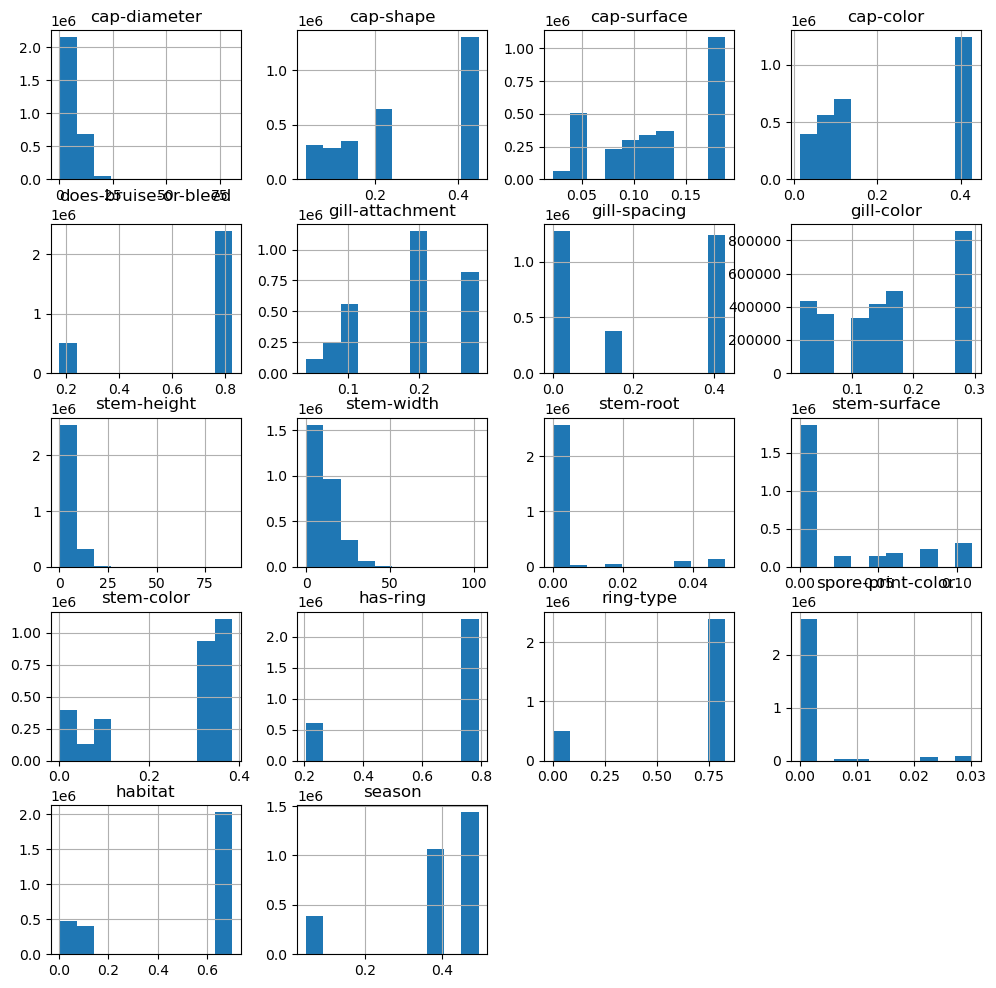

In [ ]:
X_train.hist(bins=10,figsize=(12,12))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train.describe()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,has-ring,ring-type,spore-print-color,habitat,season
count,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06,2.894000e+06
mean,6.236797e+00,2.799216e-01,1.255610e-01,2.281003e-01,7.103189e-01,1.871476e-01,2.018607e-01,1.629255e-01,6.255177e+00,1.113261e+01,4.300561e-03,2.642412e-02,2.692518e-01,6.715794e-01,6.927195e-01,1.652306e-03,5.156347e-01,3.923223e-01
std,4.678678e+00,1.623750e-01,5.525101e-02,1.748884e-01,2.468308e-01,7.785942e-02,1.996209e-01,9.738937e-02,2.689682e+00,8.219143e+00,1.287049e-02,3.948443e-02,1.380315e-01,2.373820e-01,3.007313e-01,6.253806e-03,2.809151e-01,1.387793e-01
min,3.000000e-02,3.498721e-02,2.214202e-02,1.322149e-02,1.757170e-01,4.017623e-02,0.000000e+00,1.516344e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.886662e-04,2.071012e-01,1.330684e-03,0.000000e+00,1.760885e-03,4.537630e-02
25%,3.250000e+00,1.222028e-01,8.046959e-02,6.459399e-02,8.242830e-01,9.886524e-02,0.000000e+00,7.099067e-02,4.620000e+00,4.740000e+00,0.000000e+00,0.000000e+00,1.126175e-01,7.928988e-01,8.291983e-01,0.000000e+00,1.389140e-01,3.685460e-01
50%,5.680000e+00,2.216731e-01,1.276545e-01,1.241600e-01,8.242830e-01,1.912681e-01,1.315591e-01,1.444993e-01,5.790000e+00,9.560000e+00,0.000000e+00,0.000000e+00,3.219903e-01,7.928988e-01,8.291983e-01,0.000000e+00,6.991330e-01,3.685460e-01
75%,8.180000e+00,4.496057e-01,1.868269e-01,4.275159e-01,8.242830e-01,2.837965e-01,4.277315e-01,2.958469e-01,7.230000e+00,1.563000e+01,0.000000e+00,6.386109e-02,3.838089e-01,7.928988e-01,8.291983e-01,0.000000e+00,6.991330e-01,4.963780e-01
max,8.067000e+01,4.496057e-01,1.877032e-01,4.275159e-01,8.242830e-01,2.837965e-01,4.277315e-01,2.958469e-01,8.872000e+01,1.029000e+02,4.924948e-02,1.096655e-01,3.838089e-01,7.928988e-01,8.291983e-01,3.026572e-02,6.991330e-01,4.963780e-01


In [ ]:
X_train["cap-diameter"].quantile(0.97)

14.84

In [ ]:
len(X_train["cap-diameter"][X_train["cap-diameter"] > 13.9])

108106

In [ ]:
from feature_engine.outliers import OutlierTrimmer

In [ ]:
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
X_dev.reset_index(drop=True,inplace=True)
y_dev.reset_index(drop=True,inplace=True)

In [ ]:
def Outlier(fold,column):
    IQR = X_train[column].quantile(0.75) - X_train[column].quantile(0.25)
    y_train.drop(X_train[(X_train[column].values< (X_train[column].quantile(0.25)-fold*IQR)) | (X_train[column].values> (X_train[column].quantile(0.75)+fold*IQR))].index,inplace = True)
    y_test.drop(X_test[(X_test[column].values<(X_train[column].quantile(0.25)-fold*IQR)) | (X_test[column].values>(X_train[column].quantile(0.75)+fold*IQR))].index,inplace = True)
    X_test.drop(X_test[(X_test[column].values<(X_train[column].quantile(0.25)-fold*IQR)) | (X_test[column].values>(X_train[column].quantile(0.75)+fold*IQR))].index,inplace = True)
    X_train.drop(X_train[(X_train[column].values<(X_train[column].quantile(0.25)-fold*IQR)) | (X_train[column].values>(X_train[column].quantile(0.75)+fold*IQR))].index,inplace = True)

In [ ]:
Outlier(4,"stem-height")
Outlier(3,"stem-width")
Outlier(1.2,"cap-diameter")

In [ ]:
X_train.shape

(2773691, 18)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train.describe()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,has-ring,ring-type,spore-print-color,habitat,season
count,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06,2.773691e+06
mean,5.657593e+00,2.815231e-01,1.258507e-01,2.293990e-01,7.124864e-01,1.890331e-01,2.036775e-01,1.623004e-01,6.103212e+00,1.040490e+01,4.090260e-03,2.663343e-02,2.678935e-01,6.721703e-01,6.947502e-01,1.681407e-03,5.124813e-01,3.948570e-01
std,3.087460e+00,1.624493e-01,5.520297e-02,1.753096e-01,2.449673e-01,7.796789e-02,1.999463e-01,9.772412e-02,2.366510e+00,7.289136e+00,1.267001e-02,3.964052e-02,1.382491e-01,2.369538e-01,2.988846e-01,6.349900e-03,2.821122e-01,1.365827e-01
min,3.000000e-02,3.498721e-02,2.214202e-02,1.322149e-02,1.757170e-01,4.017623e-02,0.000000e+00,1.516344e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.886662e-04,2.071012e-01,1.330684e-03,0.000000e+00,1.760885e-03,4.537630e-02
25%,3.180000e+00,1.222028e-01,8.046959e-02,6.459399e-02,8.242830e-01,9.886524e-02,0.000000e+00,7.099067e-02,4.580000e+00,4.490000e+00,0.000000e+00,0.000000e+00,1.126175e-01,7.928988e-01,8.291983e-01,0.000000e+00,1.389140e-01,3.685460e-01
50%,5.440000e+00,2.216731e-01,1.276545e-01,1.241600e-01,8.242830e-01,2.059651e-01,1.315591e-01,1.444993e-01,5.740000e+00,8.870000e+00,0.000000e+00,0.000000e+00,3.219903e-01,7.928988e-01,8.291983e-01,0.000000e+00,6.991330e-01,4.963780e-01
75%,7.830000e+00,4.496057e-01,1.868269e-01,4.275159e-01,8.242830e-01,2.837965e-01,4.277315e-01,2.958469e-01,7.140000e+00,1.470000e+01,0.000000e+00,6.386109e-02,3.838089e-01,7.928988e-01,8.291983e-01,0.000000e+00,6.991330e-01,4.963780e-01
max,1.399000e+01,4.496057e-01,1.877032e-01,4.275159e-01,8.242830e-01,2.837965e-01,4.277315e-01,2.958469e-01,1.767000e+01,4.821000e+01,4.924948e-02,1.096655e-01,3.838089e-01,7.928988e-01,8.291983e-01,3.026572e-02,6.991330e-01,4.963780e-01


array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'cap-shape'}>,
        <Axes: title={'center': 'cap-surface'}>,
        <Axes: title={'center': 'cap-color'}>],
       [<Axes: title={'center': 'does-bruise-or-bleed'}>,
        <Axes: title={'center': 'gill-attachment'}>,
        <Axes: title={'center': 'gill-spacing'}>,
        <Axes: title={'center': 'gill-color'}>],
       [<Axes: title={'center': 'stem-height'}>,
        <Axes: title={'center': 'stem-width'}>,
        <Axes: title={'center': 'stem-root'}>,
        <Axes: title={'center': 'stem-surface'}>],
       [<Axes: title={'center': 'stem-color'}>,
        <Axes: title={'center': 'has-ring'}>,
        <Axes: title={'center': 'ring-type'}>,
        <Axes: title={'center': 'spore-print-color'}>],
       [<Axes: title={'center': 'habitat'}>,
        <Axes: title={'center': 'season'}>, <Axes: >, <Axes: >]],
      dtype=object)

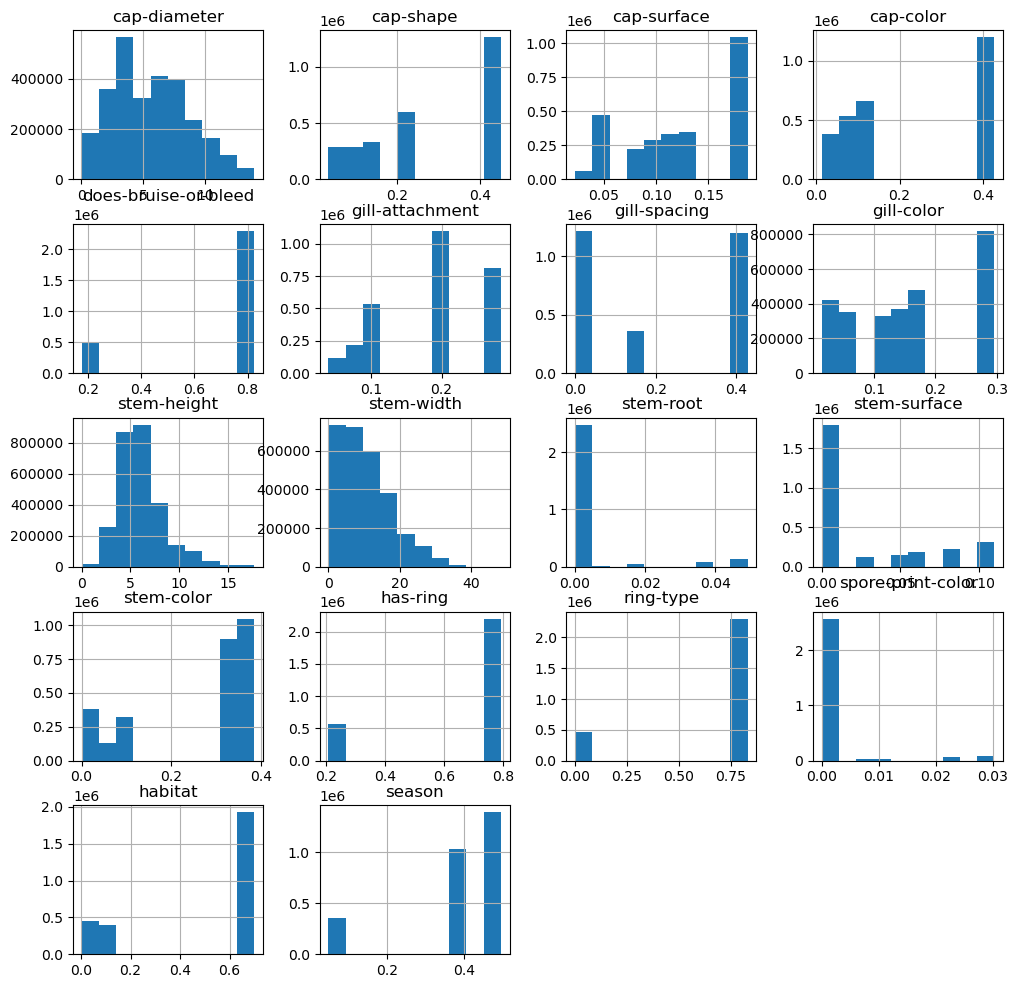

In [ ]:
X_train.hist(figsize=(12,12))

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train[['cap-diameter', 'stem-height', 'stem-width']])

MinMaxScaler()

In [ ]:
X_train[['cap-diameter', 'stem-height', 'stem-width']] = scaler.transform(X_train[['cap-diameter', 'stem-height', 'stem-width']])
X_test[['cap-diameter', 'stem-height', 'stem-width']] = scaler.transform(X_test[['cap-diameter', 'stem-height', 'stem-width']])
X_dev[['cap-diameter', 'stem-height', 'stem-width']] = scaler.transform(X_dev[['cap-diameter', 'stem-height', 'stem-width']])

In [ ]:
joblib.dump(scaler,'minmax_scaler.pkl')

['minmax_scaler.pkl']

In [ ]:
X_train

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,has-ring,ring-type,spore-print-color,habitat,season
0,0.262178,0.449606,0.187703,0.124160,0.824283,0.283796,0.427732,0.115057,0.447085,0.081933,0.000000,0.000000,0.018315,0.792899,0.829198,0.000000,0.057532,0.496378
1,0.056590,0.449606,0.103846,0.064594,0.824283,0.205965,0.000000,0.170322,0.221279,0.030906,0.000000,0.009472,0.018315,0.792899,0.829198,0.000000,0.699133,0.496378
2,0.587393,0.036434,0.044393,0.427516,0.824283,0.283796,0.427732,0.052553,0.084324,0.284381,0.000000,0.000000,0.112617,0.792899,0.829198,0.000000,0.699133,0.496378
3,0.514327,0.449606,0.186827,0.024483,0.824283,0.205965,0.427732,0.295847,0.299943,0.247459,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.496378
4,0.112464,0.099381,0.103846,0.427516,0.824283,0.283796,0.427732,0.170322,0.268251,0.051234,0.000000,0.000000,0.321990,0.792899,0.829198,0.000000,0.050491,0.045376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893995,0.639685,0.035716,0.117447,0.427516,0.824283,0.086335,0.000000,0.295847,0.528580,0.571251,0.009565,0.000000,0.321990,0.792899,0.829198,0.011895,0.699133,0.496378
2893996,0.527221,0.449606,0.186827,0.020533,0.824283,0.191268,0.131559,0.015814,0.338993,0.265505,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.089700
2893997,0.136819,0.099381,0.103846,0.070517,0.824283,0.205965,0.000000,0.070991,0.306169,0.043974,0.000000,0.109666,0.044194,0.792899,0.829198,0.000000,0.699133,0.496378
2893998,0.254298,0.449606,0.186827,0.124160,0.824283,0.191268,0.427732,0.295847,0.196378,0.166770,0.000000,0.000000,0.383809,0.792899,0.829198,0.000000,0.699133,0.368546


array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'cap-shape'}>,
        <Axes: title={'center': 'cap-surface'}>,
        <Axes: title={'center': 'cap-color'}>],
       [<Axes: title={'center': 'does-bruise-or-bleed'}>,
        <Axes: title={'center': 'gill-attachment'}>,
        <Axes: title={'center': 'gill-spacing'}>,
        <Axes: title={'center': 'gill-color'}>],
       [<Axes: title={'center': 'stem-height'}>,
        <Axes: title={'center': 'stem-width'}>,
        <Axes: title={'center': 'stem-root'}>,
        <Axes: title={'center': 'stem-surface'}>],
       [<Axes: title={'center': 'stem-color'}>,
        <Axes: title={'center': 'has-ring'}>,
        <Axes: title={'center': 'ring-type'}>,
        <Axes: title={'center': 'spore-print-color'}>],
       [<Axes: title={'center': 'habitat'}>,
        <Axes: title={'center': 'season'}>, <Axes: >, <Axes: >]],
      dtype=object)

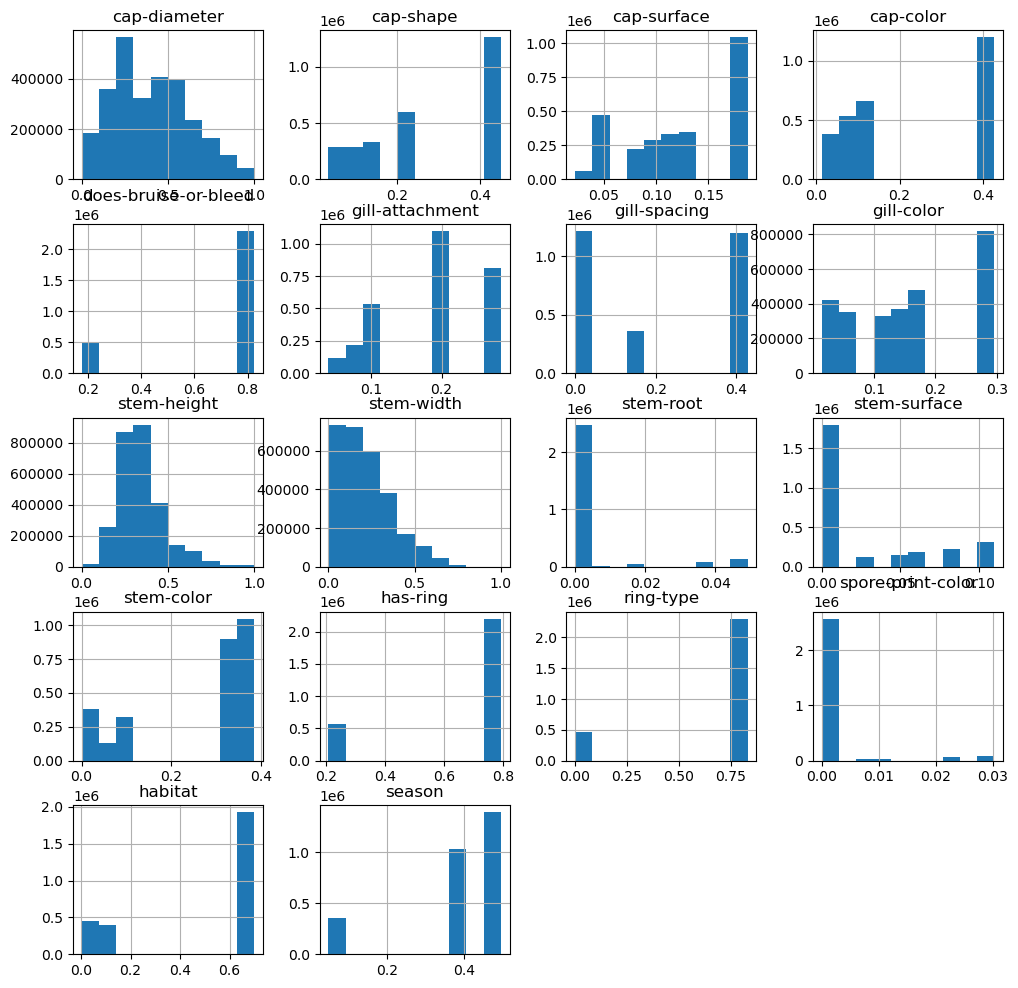

In [ ]:
X_train.hist(figsize=(12,12))

<b>End of pre processing</b>

<b>Model</b>

In [ ]:
from tensorflow import keras
from keras import layers

In [ ]:
X_train, X_dev_train, y_train, y_dev_train = train_test_split(
  X_train,
  y_train,
  test_size = 0.0038,
  random_state = 0
)

In [ ]:
X_dev_train.shape

(10541, 18)

In [ ]:
X_train = tf.convert_to_tensor(X_train.values)
y_train = tf.convert_to_tensor(y_train.values)
X_test = tf.convert_to_tensor(X_test.values)
y_test = tf.convert_to_tensor(y_test.values)
X_dev = tf.convert_to_tensor(X_dev.values)
y_dev = tf.convert_to_tensor(y_dev.values)
X_dev_train = tf.convert_to_tensor(X_dev_train.values)
y_dev_train = tf.convert_to_tensor(y_dev_train.values)

In [ ]:
y_train = tf.cast(y_train, dtype=tf.float64)
y_test = tf.cast(y_test, dtype=tf.float64)
y_dev = tf.cast(y_dev, dtype=tf.float64)
y_dev_train = tf.cast(y_dev_train, dtype=tf.float64)

In [ ]:
X_train

<tf.Tensor: shape=(2763150, 18), dtype=float64, numpy=
array([[0.47922636, 0.44960574, 0.02214202, ..., 0.        , 0.69913303,
        0.49637802],
       [0.17908309, 0.44960574, 0.10384589, ..., 0.        , 0.69913303,
        0.49637802],
       [0.23567335, 0.09938079, 0.12765446, ..., 0.        , 0.69913303,
        0.08969972],
       ...,
       [0.22277937, 0.44960574, 0.18770318, ..., 0.        , 0.05753214,
        0.49637802],
       [0.73065903, 0.44960574, 0.12765446, ..., 0.        , 0.69913303,
        0.49637802],
       [0.41690544, 0.44960574, 0.08046959, ..., 0.        , 0.05753214,
        0.08969972]])>

In [ ]:
def ModelBuilder():
    inputs = keras.Input(shape = (18))
    X1 = layers.Dense(18,activation = "relu")(inputs)
    X2 = layers.Dense(36,activation = "relu")(X1)
    X3 = layers.Dense(18,activation = "relu")(X2)
    X4 = layers.Dense(28,activation = "relu")(X3 + X1)
    X5 = layers.Dense(20,activation = "relu")(X4)
    X6 = layers.Dense(20,activation = "relu")(X5)
    X6 = layers.Dropout(0.3)(X6)
    X6 = layers.Dense(16,activation = "relu")(X5 + X6)
    X7 = layers.Dense(10,activation = "relu")(X6)
    X8 = layers.Dense(10,activation = "relu")(X7)
    X8 = layers.Dropout(0.3)(X8)
    X9 = layers.Dense(5,activation = "relu")(X8 + X7)
    output = layers.Dense(1,activation = "sigmoid")(X9)
    model = keras.Model(inputs = inputs, outputs = output)
    return model

In [ ]:
import os

In [ ]:
#CH_path = "MASHROOM_CLASSIFICATION/cp.ckpt"
#CH_dir = os.path.dirname(CH_path)

In [ ]:
#cp_callbacks = tf.keras.callbacks.ModelCheckpoint(
#filepath = CH_path,
#save_weights_only=True,
#verbose=1
#)

In [ ]:
class CustomLearningRateScheduler(tf.keras.callbacks.Callback):
    def __init__(self, loss_limits:list, lr_reduction_factor, max_lr=1e-7):
        super(CustomLearningRateScheduler, self).__init__()
        self.loss_limits = loss_limits
        self.lr_reduction_factor = lr_reduction_factor
        self.max_lr = max_lr

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('val_loss')
        current_lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))
        
        if  len(self.loss_limits)!=0 and current_loss < self.loss_limits[0][0] and current_loss > self.loss_limits[0][1]:
            new_lr = min(current_lr * self.lr_reduction_factor, self.max_lr)
            tf.keras.backend.set_value(self.model.optimizer.lr, new_lr)
            print(f"lr : {new_lr}")
        elif len(self.loss_limits)!=0 and current_loss < self.loss_limits[0][1] and len(self.loss_limits)!=1:
            self.loss_limits.pop(0)

In [ ]:
lr_custom_callback = CustomLearningRateScheduler(
    loss_limits = [(0.09,0.08),(0.07,0.06)],
    lr_reduction_factor = 1.03,
    max_lr = 3e-3
)

In [ ]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'loss',
    factor = 0.85,
    patience = 3,
    min_lr = 0.8e-3
)

In [ ]:
#model = ModelBuilder()
#model.compile(
#loss = keras.losses.BinaryCrossentropy(),
#optimizer = tf.keras.optimizers.Adam(learning_rate= 2.5e-3),
#metrics = [keras.metrics.F1Score(),"accuracy"])
#model.fit(
#X_train,
#y_train,
#validation_data=(X_dev, y_dev),
#callbacks=[lr_callback,lr_custom_callback,cp_callbacks],
#batch_size=10000, 
#epochs=200, 
#verbose=2)

In [ ]:
#os.listdir(CH_dir)

In [ ]:
#model.evaluate(X_train,y_train)
#model.evaluate(X_dev,y_dev)
#model.evaluate(X_dev_train,y_dev_train)

In [ ]:
#model.evaluate(X_test,y_test)

In [ ]:
#model.summary()